# MAPS 2022 Cartopy, NetCDF and maybe a little geopandas.  

## Maps

### Today we are going to use Python to make maps.  Many people use ARCgis or google maps etc.  But once you have data in python it is nice to be able to make maps right there in python.  Especially if you are doing analyses.  You can run an analysis and make maps in one fell swoop. It is quite nice.  Then if you have multiple parameters you could also make lots of maps quickly!  So we are going to try and make a map. 

### We are going to try and do two mapping libraries for two reasons.  This is a relatively new notebook so lets see how it goes.  These are the mapping libraries you may hear about.

#### Mapping is a little bit of the wild west in Python.  Not quite a perfect consensus on what people do yet.  But once you learn one library it is easier to learn the next one.

- Basemap - Publication quality maps. This was my favorite and they stopped updating it.  They just started updating it again but we are not going to use it yet.

- Folium.  This makes interactive maps for web.  Here is an example I made for the Red Hook Lead Project. https://bmaillou.github.io/RedHookLead/

- Cartopy is supposed to replace basemap.  It sort of does it.  We will use it some.

-  Geopandas.  This is becoming more popular.  I haven't learned it well yet.  But I am trying and will introduce a bit of it.

-  contextily.  I just learned about contextily.  Seems like it could be really helpful.  






## We are going to do 2 things today.
These are two essential things you always do with data.  
- Plot points on a map
- Make contour maps


### First run to turn on the libraries below.

You will probably get errors for not installed.  If not installed we can install them.  

In [1]:
# The usual libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

#################################
# The new ones
import netCDF4

import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
#import contextily as ctx

import datetime

### ERROR! You should get an error that you don't have netCDF4 installed.  :(     So you need to install it!
The power of python is the installation of libraries!  

1.  First Try insalling from the Anaconda Navigator.  Click on environment and then all packages and search for it.  If this fails follow below. 
1.  I use conda to do my installation.  
1.  google conda install netcd4
1.  You should get to this webpage.  https://anaconda.org/anaconda/netcdf4
1.  scroll down and copy the install instructions.  conda install -c anaconda netcdf4
1.  Now open a new terminal window or conda shell on windows.
1.  paste in conda install -c anaconda netcdf4 and hit return
1.  It should install.
1.  then go up to Kernal->Restart and see if that error went away.
1.  If you can't do it from the terminal or command prompt you can do it in jupyter notebook. Here is a link describing how.   https://medium.com/@thabangline/how-to-use-conda-and-pip-to-install-packages-within-jupyter-notebook-d0f2ed23b059  I did it in the next cell.
1.  If it works then do the same for cartopy
1.  There are 1000's of more python packages online you can install!
1.  We are going to skip contextily for now. I couldn't get conda to work.  I did  "pip install contextily"

In [177]:
import sys
!conda install --yes --prefix {sys.prefix} -c anaconda netcdf4

Solving environment: done

## Package Plan ##

  environment location: /Users/bmaillou/anaconda3

  added / updated specs:
    - netcdf4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    certifi-2020.6.20          |           py38_0         159 KB  anaconda
    netcdf4-1.5.3              |   py38h28545a2_0         480 KB  anaconda
    openssl-1.1.1h             |       haf1e3a3_0         3.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.10.26~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2021.10.8-py38h5~ --> anaconda::certifi-2020.6.20-py38_0
  netcdf4  

### Now lets make our first map
#### ccrs is cartopy!!!!  It is a mapping function
-  Start like normal
-  then do plt.axes and add a projection.
-  Then I add the iamge of the earth

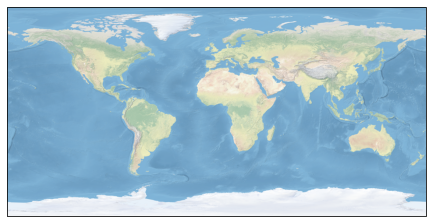

In [2]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

The fig,ax=plt.subplots is a little fake as we overwrite ax a few lines down.  But I feel like it keeps our brains consistent and in line

Now you can change projections.  just google cartopy projections.  https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

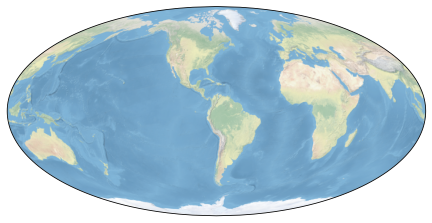

In [3]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

#I centered it on new york!!!
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-73)) 
ax.stock_img()

One more projection.  They all have strengths and weaknesses.  remember you CANNOT take a sphere and perfectly project on paper.  Greenland is not that big!

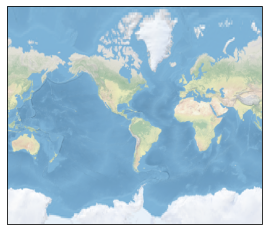

In [4]:
fig,ax=plt.subplots()
#I centered it on new york!!!
ax = plt.axes(projection=ccrs.Mercator(central_longitude=-73)) 
ax.stock_img()

Instead of the image you could add different features.  

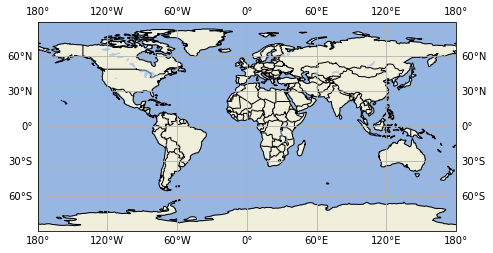

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

ax.gridlines(draw_labels=True)

### Now let's plot all the CO2 stations from Scripps on the map.  
Grab the file from the website.  read it in.  check it out.  Then we can plot.  I used the xkcd colors! https://xkcd.com/color/rgb/   and here is an appropriate xkcd for us. https://xkcd.com/2537

In [6]:
df=pd.read_excel('CO2Stations.xlsx')

In [7]:
df

,StationName,StationCode,Latitude,Longitude,Elevation,Dates
0,"Alert, NWT, Canada",ALT,82.3,-62.3,210,1985 - present
1,"Point Barrow, Alaska",PTB,71.3,-156.6,11,1961 - present
2,"La Jolla Pier, California",LJO,32.9,-117.3,10,1957 - present
3,"Mauna Loa Observatory, Hawaii",MLO,19.5,-155.6,3397,1958 - present
4,"Cape Kumukahi, Hawaii",KUM,19.5,-154.8,3,1979 - present
5,Christmas Island,CHR,2.0,-157.3,2,1974 - present
6,American Samoa,SAM,-14.2,-170.6,30,1981 - present
7,Kermadec Island,KER,-29.2,-177.9,2,1982 -present
8,"Baring Head, New Zealand",NZD,-41.4,-174.9,85,1977 - present
9,South Pole,SPO,-90.0,-90.0,2810,1957 - present


### Lat/Long

But to plot points we need to remember what latitude and longitude are.  So look at the figure!  

This wrecks my mind and I just memorized it.  We always plot x,y.   But we always say lat/long.  Latitude then longitude.  But x=Longitude and y=Latitude.  

So when we plot ax.scatter(x,y). We need to do a flip when we plot locations and need to plot ax.scatter(long,lat).  

Make any sense?????



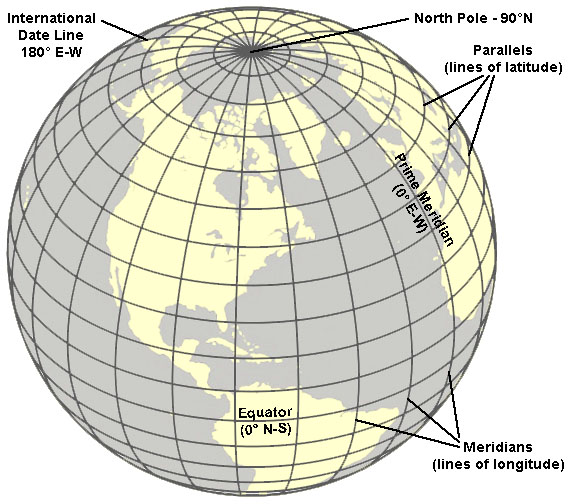

In [8]:
from IPython.display import Image
Image('globe.jpg')

### plotting points is easy!
-  Use your ax.scatter like normal
-  reverse the order from how you say it  (remember this!!!!!)
-  transform your axes.  This means it takes the lat/long coordinates and plots them nicely.  

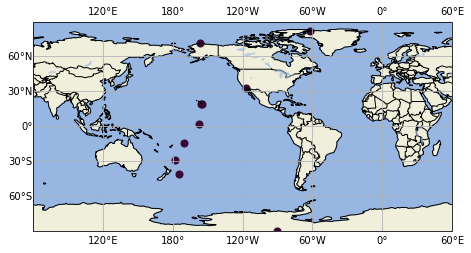

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)
ax.set_global()
  

# Lets add Text to the map
-   Grab your ax.text nomenclature.
- if you do transform=ax.transAxes remember then you plot as a fractional location in x and y.  
- I put mine at x=0.4, y=0.75

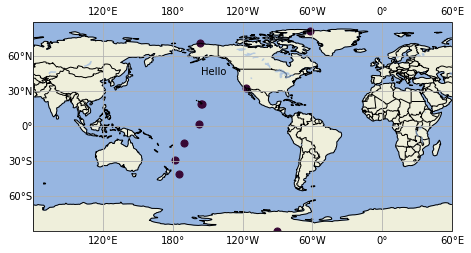

In [9]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)

ax.text(0.4,0.75,'Hello',transform=ax.transAxes)

ax.set_global()

### Now you can add you props to make a bbox (bounding box)

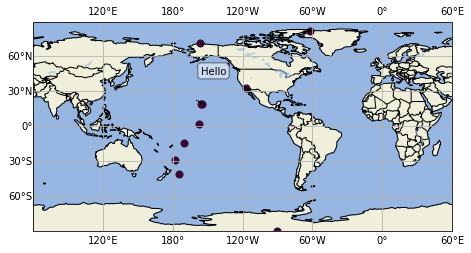

In [10]:
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)

ax.text(0.4,0.75,'Hello',transform=ax.transAxes,bbox=props)

ax.set_global()

### But we want to place the text with the points.   So we want to plot lat long.  So lets do the lat/long transformation.

Let's try Mauna Loa first.It is Lat=19.5	Long=-155.6


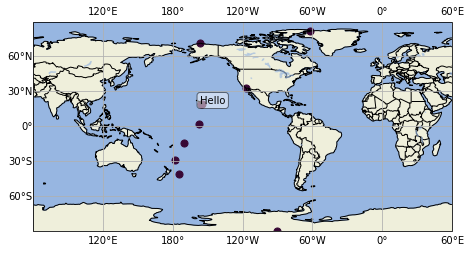

In [11]:
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)

ax.text(-156.6,19.5,'Hello',transform=ccrs.PlateCarree(),bbox=props)

ax.set_global()

It covers the point.  This is annoying to fix in python so I would just add 10 to the longitude.

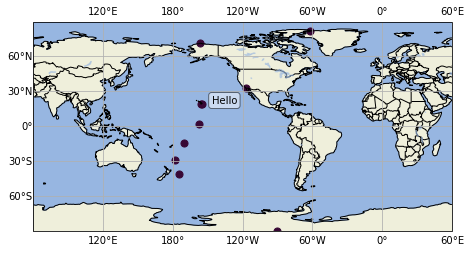

In [12]:
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)
ax.text(-156.6+10,19.5,'Hello',transform=ccrs.PlateCarree(),bbox=props)

ax.set_global()

#### What is coming next?   
-  ax.text is annoying.  You can not just pass all the locations from the dataframe.  
-  you need to for loop over each row one by one and add the text.  You do this with iterrows.
-  iterrows returns the row and the index of the row.  
-  so lets try.  We can do df.itterrows():
-  I call my output idx=index and dfR=dataframe of that row

In [13]:
for idx,dfR in df.iterrows():
    print(idx,dfR)

0 StationName    Alert, NWT, Canada
StationCode                   ALT
Latitude                     82.3
Longitude                   -62.3
Elevation                     210
Dates              1985 - present
Name: 0, dtype: object
1 StationName    Point Barrow, Alaska
StationCode                     PTB
Latitude                       71.3
Longitude                    -156.6
Elevation                        11
Dates                1961 - present
Name: 1, dtype: object
2 StationName    La Jolla Pier, California
StationCode                          LJO
Latitude                            32.9
Longitude                         -117.3
Elevation                             10
Dates                     1957 - present
Name: 2, dtype: object
3 StationName    Mauna Loa Observatory, Hawaii
StationCode                              MLO
Latitude                                19.5
Longitude                             -155.6
Elevation                               3397
Dates                         19

But now what we want is the longitude, latitude, name.  So lets just print them

In [14]:
for idx,dfR in df.iterrows():
    print(dfR['Longitude'],dfR['Latitude'],dfR['StationName'])

-62.3 82.3 Alert, NWT, Canada
-156.6 71.3 Point Barrow, Alaska
-117.3 32.9 La Jolla Pier, California
-155.6 19.5 Mauna Loa Observatory, Hawaii
-154.8 19.5 Cape Kumukahi, Hawaii
-157.3 2.0 Christmas Island
-170.6 -14.2 American Samoa
-177.9 -29.2 Kermadec Island
-174.9 -41.4 Baring Head, New Zealand
-90.0 -90.0 South Pole


Now put it together and make your labeled map!!!

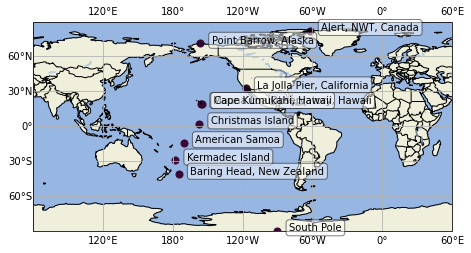

## HOMEWORK
- Do a world map.
- Show and label five places you want to travel to
- use an excel file to load your five places.

## Now something really cool. Lets plot surface temperatures on the day we were born!!!!

We will use this NOAA website to retrieve the data.
https://psl.noaa.gov/data/composites/day/
-  Choose Variable ->air temperature
-  choose anaylis level -> surface
-  add your birthday to a box.  look at order it is year-month-day
-  move down and do plot type mean
-  do region of globe all
-  press create plot
-  just enjoy the graph/map.  But we want to do better on python. 
-  make sure it is the correct date and parameter
-  Click on "Get a copy of the netCDF data file used for the plot"
-  This will downlaod the netcdf file
-  move the NetCDF file to the directory where you work and we are readyto work!
-  Do the next two cells and then try to read the metadata and make sense of it!



### NetCDF
### But you also need NetCDF.   
You can learn about NetCDF at https://www.unidata.ucar.edu/software/netcdf/.  From the website.  "NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. The Unidata Program Center supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces are also available for Python, IDL, MATLAB, R, Ruby, and Perl."

This is going to be weird to you.  netcdf files are in binary format so you can never "see" them.  I feel like csv files are intuitive.  You can see the columns.  NetCDF files are have headers that tell you what is in them.  I see them a lot with spatial data for example sea surface temperatures.  But they also have a funny format.  They list types of data one at a time and not in a table.  So it is all latitude data, then all longitude data, then all time data, then all temperature data etc.   It takes get used to.   



#### In the past students have told me that they have stood out in internships becuase they knew about NetCDF files. 

So lets start.  file is the name of the file you downloaded

You read the data into a parameter called f.  This is just what people do.  f then contains all the information you need.  it is sort of like a dataframe for netcdf but you never see the data.  you probe at it.

In [25]:
file=('compday.14irvFWHtn.nc')
f=netCDF4.Dataset(file)

In [27]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Composite Value
    history: Created via daily composite webtool at NOAA/ESRL PSD
    description: Computed from the web page http://www.esrl.noaa.gov/psd/data/composites/day/ NOAA/ESRL PSD
    Conventions: COARDS
    dimensions(sizes): lon(144), lat(73), time(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time,lat,lon)
    groups: 


<ipython-input-27-b30fe898003a>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f)


Read what it just said.  Ignore the warning.  It tells you all the variables and how big the are.  So we want the lat,long,time, and air.   This will give us the location for the data so we can map it

#### Now we will print the metada for each variable.  

#### These are crazy file formats.  Just go along with it and learn.

In [20]:
print (f.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    actual_range: [ 90. -90.]
    long_name: Latitude
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-20-bd934758bff6>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['lat'])


In [21]:
print (f.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-21-3928fc27ac36>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['lon'])


In [22]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 1800-1-1 00:00:0.0
    long_name: Time
    actual_range: [1509000. 1509000.]
    delta_t: 0000-01-00 00:00:00
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-22-bcbaa96a41be>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['time'])


In [23]:
print (f.variables['air'])

<class 'netCDF4._netCDF4.Variable'>
float32 air(time, lat, lon)
    long_name: Air Temperature
    valid_range: [-99999.  99999.]
    actual_range: [ 93.03 377.2 ]
    units: degK
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 99
    least_significant_digit: 99
    var_desc: Air Temperature
    dataset: CDC Derived NCEP Reanalysis Products
    level_desc: Surface
    statistic: Composite
    parent_stat: Other
unlimited dimensions: time
current shape = (1, 73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-23-18b48fa1db64>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['air'])


#### Now to actually see the data.

In [28]:
 f.variables['lat'][:]

masked_array(data=[ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,
                    70. ,  67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,
                    50. ,  47.5,  45. ,  42.5,  40. ,  37.5,  35. ,  32.5,
                    30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,  12.5,
                    10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
                   -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5,
                   -30. , -32.5, -35. , -37.5, -40. , -42.5, -45. , -47.5,
                   -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. , -67.5,
                   -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
                   -90. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

As you can see latititude goes from 90 to -90.  

#### Now to make life easier we can set parameters to the variables to make them easy to use

In [29]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
air=f.variables['air'][:]
time=f.variables['time'][:]

In [30]:
air

masked_array(
  data=[[[240.43   , 240.43   , 240.43   , ..., 240.43   , 240.43   ,
          240.43   ],
         [239.45001, 239.43   , 239.4    , ..., 239.55002, 239.48001,
          239.48001],
         [242.30002, 242.33002, 242.36002, ..., 241.93   , 242.05002,
          242.20999],
         ...,
         [230.36002, 230.45999, 230.61002, ..., 230.78   , 230.53   ,
          230.38   ],
         [231.70001, 231.61002, 231.55002, ..., 232.11002, 231.98001,
          231.78   ],
         [231.38   , 231.38   , 231.38   , ..., 231.38   , 231.38   ,
          231.38   ]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

Now do you remember the units on the air temperature?  Look up above for air.  it is kelvin!  Now what real scientist uses Kelvin?  i am going ot convert to good ole fahrenheit!  

In [33]:
air=air-273.15
air=air*9/5+32

But how does the air temperature work?  Lets look at it and figure it out.  

In [22]:
np.shape(air)

(1, 73, 144)

In [23]:
print(np.shape(lat))
print(np.shape(lon))
print(np.shape(time))
print(np.shape(air))

(73,)
(144,)
(1,)
(1, 73, 144)


It is a three dimensional array.  It has only 1 data dimenssion and is then 73 by 144.  Remember 73 is latitude.  So it has 73 entries north south and then 144 east west.  So it is a big array of temperatures.  Sort of like when we did the "Brian.csv" lab!  Lets do the simplest thing to look at it.

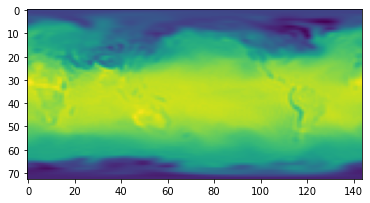

In [24]:
fig,ax=plt.subplots()
ax.imshow(air[0])

I can sort of pick out the continents but the axes make no sense.  Instead we can use pcolormeash with the lat and lon to make a plot.  Then we can add a colorbar.

<ipython-input-25-85d2513a2bb2>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax.pcolormesh(lon,lat,air[0])


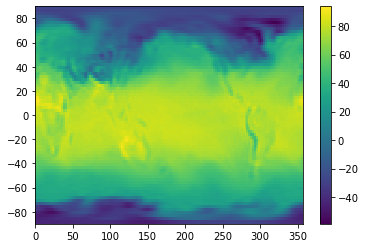

In [25]:
fig,ax=plt.subplots()
pc=ax.pcolormesh(lon,lat,air[0])
fig.colorbar(pc)

#### Let's make a real map instead!  
-  Grab your map from above 
-  Just show the ax.coastline() and countries.
-  Now we are going to add countouf.  the f is for filled.
-  Here is the example https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
-  add lon, lat, air[0], transform,  choose your cmap, and levels. 
-  I did a lot of levels to really smooth it.


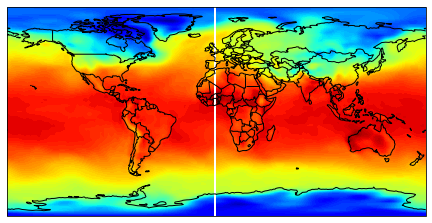

In [31]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

ax.contourf(lon, lat, air[0],
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=100)

That looks sharp!  Let's now add a colorbar.  There are two ways to add a colorbar.  This is way 1.
-  Set the contourf equal to someting.
-  add a new set of axes where you want tthe color bar. 
-  turn on the colorbar
-  add a title

Text(0.5, 1.0, 'Temp\n(°f)')

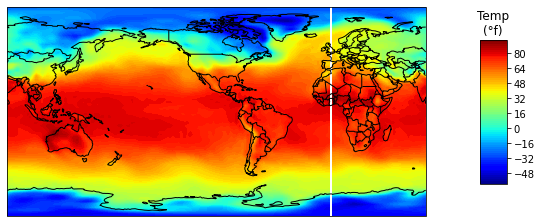

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

air_contour=ax.contourf(lon, lat, air[0],
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=100)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}f)')


If you want to get rid of the white line you can google it.  https://stackoverflow.com/questions/56348136/white-line-in-contour-plot-in-cartopy-on-center-longitude

-  I added the one line
-  I used "data" in contourf

Text(0.5, 1.0, 'Temp\n(°f)')

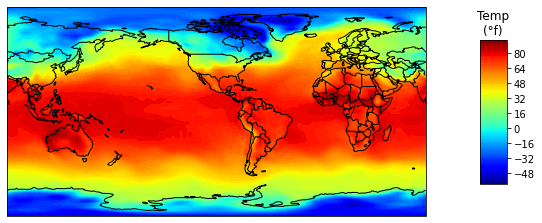

In [35]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

# gets rid of white line and use data for plot.
data, lonW = add_cyclic_point(air[0], coord=lon)  


air_contour=ax.contourf(lonW, lat, data,
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=100)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}f)')

Let's just look at the US on my birthday!  But also, since we did the cyclic function we need to keep using data.  it altered the arrays and we need to keep with them or reread the data

Text(0.5, 1.0, 'Temp\n(°f)')

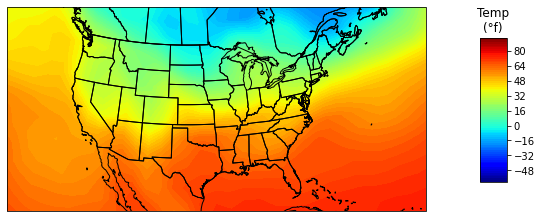

In [36]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-100)) 

air_contour=ax.contourf(lon, lat, air[0],
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=100)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES)
ax.set_extent([-130,-60,20,50])

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}f)')

### Now add a star (*) to where you were born
-  Choose a fun xkcd color
-  make the symbol big
-  make it a star! or something else fun
-  If you were born in another part of the world show it off!!!!! If you don't want me to know; lie and make something up.  
-  If your star is getting stuck behind some drawings add the key worder "zorder=10".  zorder tells it where to plot on top of each other and the higher number is on top.  

Text(0.5, 1.0, 'Temp\n(°f)')

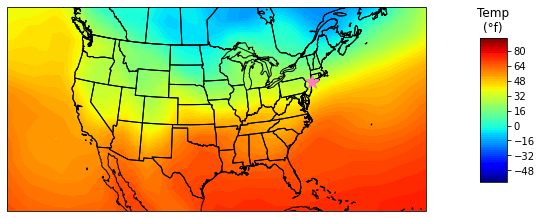

### That is a great map.  But to understand if we did thing correctly we need to understand the time.    (add bad time pun here).    So Let's add a nice date to the graph that we get from the netcdf file.

In [30]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 1800-1-1 00:00:0.0
    long_name: Time
    actual_range: [1509000. 1509000.]
    delta_t: 0000-01-00 00:00:00
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-30-bcbaa96a41be>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['time'])


What does this mean?????  Time since 1800. In hours!   Holy crazy.  Lets look.  But excel does this also.  You choose a starting date and just keep track of the days since that time.  I think excel starts at 1/1/1900.  Lets check and see if it makes sense.  The number of hours is 1509000.  Divide that by 365/24 and lets see if it is  year until when I was born.

In [31]:
time

masked_array(data=[1509000.],
             mask=False,
       fill_value=1e+20)

In [32]:
1509000/365/24

172.26027397260273

Luckily python offers ways to deal with it.

Luckily Python has a datetime module!!!  We have been using it in Pandas w/o you realizing it.  https://docs.python.org/2/library/datetime.html

In [ ]:
datetime.

We can use dateime and make a dateime parameter.  Just like we have strings, ints, and floats we can make a datetime that we can play with 

So lets add the year,month,day and see what happens

In [38]:
datetime.datetime(2024,4,1)

datetime.datetime(2024, 4, 1, 0, 0)

In [39]:
today=datetime.datetime(2021,11,20)
print (today)
type(today)

2021-11-20 00:00:00


datetime.datetime

See how the type is a datetime!

So we can make ourselves a datetime!  plus datetime has a function called timedelta....  It figures out how long given leap years and all that!  You create a timedelta type.  So it tells you how long 

In [40]:
?datetime.timedelta

so we need to make a timedelta.  Remember delta means change in math terminology!

In [41]:
datedelta=datetime.timedelta(hours=1509000)
print (datedelta)
print(type(datedelta))

62875 days, 0:00:00
<class 'datetime.timedelta'>


So timedelta is an anount of time.   so we can put in our value and get a timedelta

In [42]:
datedelta=datetime.timedelta(hours=time[0])
print (datedelta)
print(type(datedelta))

62875 days, 0:00:00
<class 'datetime.timedelta'>


We can now do time math!  This is crazy again.  But we first need to set a start date

In [43]:
startdate=datetime.datetime(1800,1,1)
print (startdate)
print(type(startdate))

1800-01-01 00:00:00
<class 'datetime.datetime'>


Now we can just add them.  

In [44]:
print (startdate+datedelta)

1972-02-24 00:00:00


Lets set the date and print it nicely.  Here is a summary of printing dates https://stackoverflow.com/questions/311627/how-to-print-a-date-in-a-regular-format

In [45]:
mapdate=startdate+datedelta
print ("The date is {:%B %d, %Y}".format(mapdate))

The date is February 24, 1972


So lets go back and make our map look great!  Add a title.   Save it and send to family or friends!  Ask someone who remembers when you wer born if the temperature makes sense.  Plus hand it in for homework.

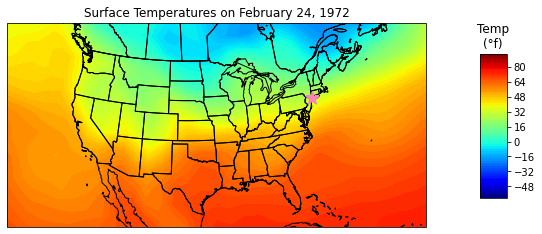

# Answers

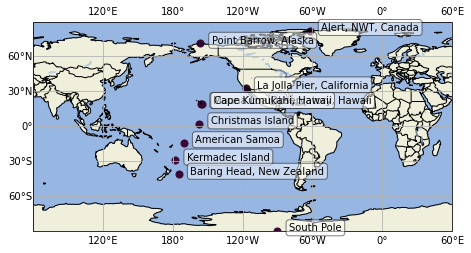

In [16]:
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120)) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.gridlines(draw_labels=True)
ax.scatter(df.Longitude,df.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)

for idx,dfR in df.iterrows():
    ax.text(dfR['Longitude']+10,dfR['Latitude'],dfR['StationName'],transform=ccrs.PlateCarree(),bbox=props)

ax.set_global()